In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew
import numpy as np
import seaborn as sns

os.getcwd()

'/Users/diyouva/Data Science Project/Github/WCO-Exercise-5'

In [3]:
data = pd.read_csv(f'./data/Exercise 5.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   sgd.id        100000 non-null  object
 1   sgd.date      100000 non-null  object
 2   importer.id   100000 non-null  object
 3   declarant.id  100000 non-null  object
 4   country       100000 non-null  object
 5   office.id     100000 non-null  object
 6   tariff.code   100000 non-null  int64 
 7   quantity      100000 non-null  int64 
 8   gross.weight  100000 non-null  int64 
 9   fob.value     100000 non-null  int64 
 10  cif.value     100000 non-null  int64 
 11  total.taxes   100000 non-null  int64 
 12  illicit       100000 non-null  int64 
 13  revenue       100000 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 10.7+ MB


In [4]:
# Summary statistics for numerical features
print("\nSummary statistics for numerical features:")
print(data.describe())

# Summary statistics for categorical features
print("\nSummary statistics for categorical features:")
print(data.describe(include=['object', 'category']))


Summary statistics for numerical features:
        tariff.code       quantity  gross.weight     fob.value     cif.value  \
count  1.000000e+05  100000.000000  1.000000e+05  1.000000e+05  1.000000e+05   
mean   7.862537e+09    1453.126430  1.752154e+05  7.821273e+04  9.780208e+04   
std    1.920216e+09    4528.045393  8.456747e+05  3.004319e+05  3.698604e+05   
min    1.019000e+08       1.000000  6.000000e+00  5.360000e+02  7.740000e+02   
25%    8.513100e+09       1.000000  1.854000e+03  2.750000e+03  3.647000e+03   
50%    8.703231e+09      20.000000  2.531250e+04  6.794000e+03  8.623000e+03   
75%    8.703243e+09     816.000000  2.162355e+05  6.637925e+04  8.366650e+04   
max    9.710000e+09  105816.000000  7.986422e+07  1.372564e+07  1.563633e+07   

        total.taxes        illicit        revenue  
count  1.000000e+05  100000.000000  100000.000000  
mean   7.157333e+03       0.075790      82.683320  
std    2.225174e+04       0.264663     325.262003  
min    0.000000e+00       0

In [5]:
# Check for duplicate rows
duplicates = data.duplicated()
print("\nNumber of duplicate rows:", duplicates.sum())

# Display duplicate rows
if duplicates.any():
    print("\nDuplicate rows:")
    print(data[duplicates])


Number of duplicate rows: 0


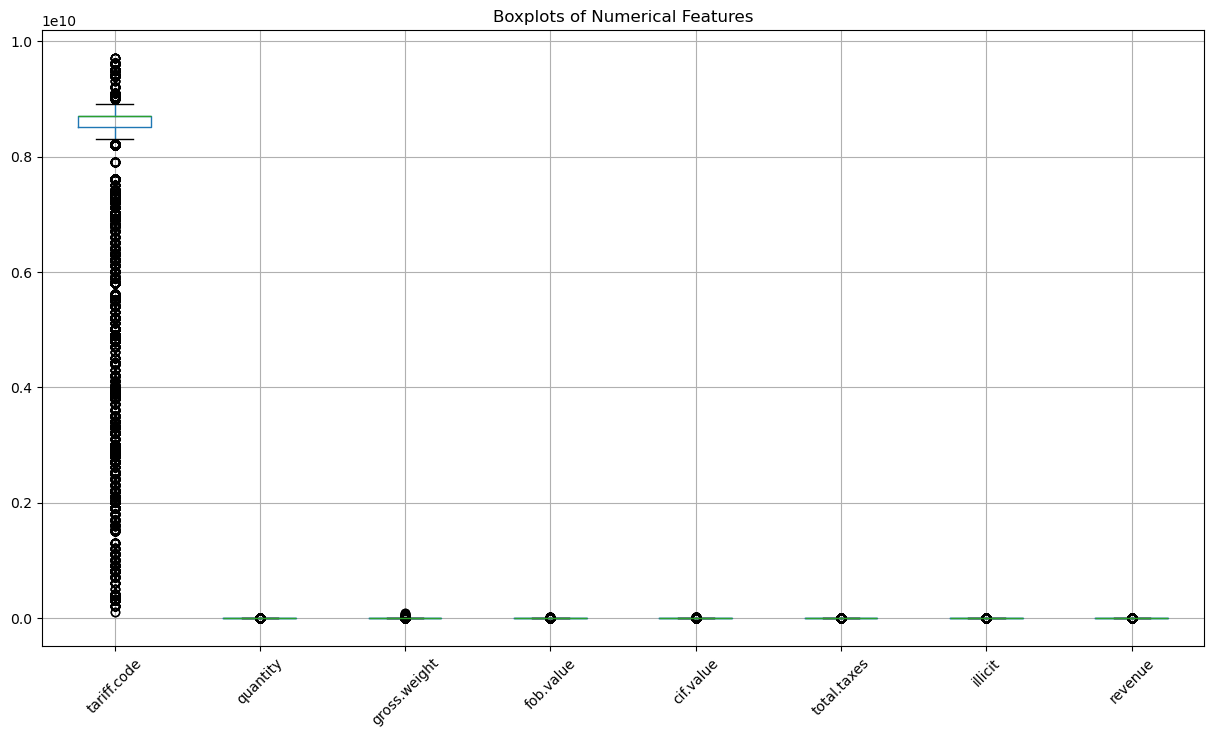

In [6]:
# Boxplot to detect outliers for numerical features
numerical_columns = data.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 8))
data[numerical_columns].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplots of Numerical Features")
plt.show()


Skewness of numerical features:
tariff.code     -2.321907
quantity         6.569726
gross.weight    48.152222
fob.value       14.163070
cif.value       13.293857
total.taxes     16.122148
illicit          3.205676
revenue          4.747311
dtype: float64


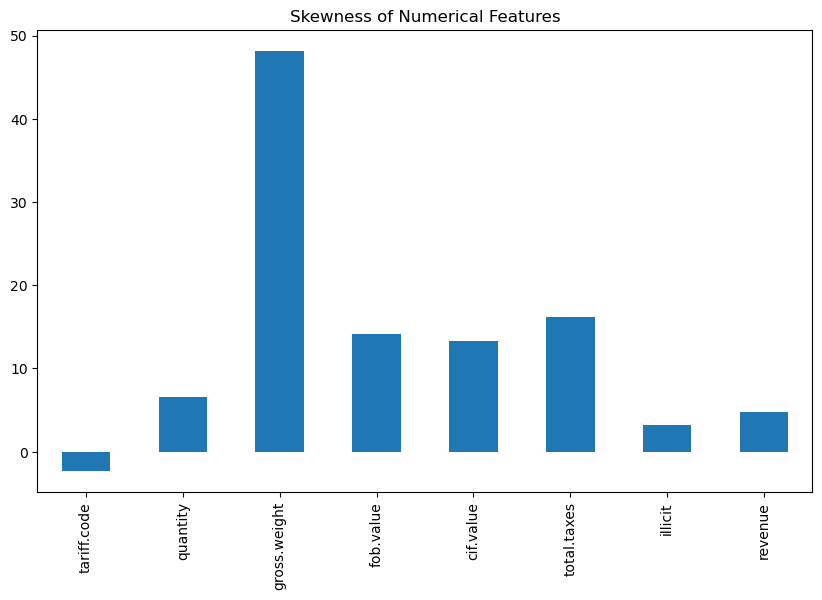

In [7]:
# Calculate skewness for numerical columns
skewness = data[numerical_columns].apply(skew, nan_policy='omit')
print("\nSkewness of numerical features:")
print(skewness)

# Visualize skewness
skewness.plot(kind='bar', figsize=(10, 6), title='Skewness of Numerical Features')
plt.show()

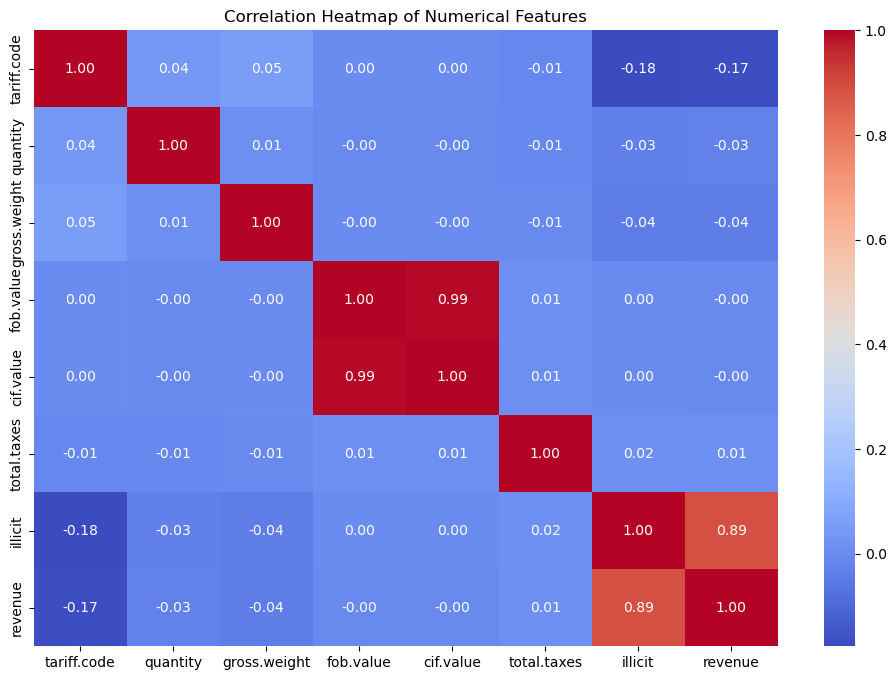

In [11]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(data[numerical_columns].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


Value counts for target 'revenue':
revenue
0       92421
625        17
957        16
981        14
1004       14
        ...  
1939        1
1821        1
411         1
1713        1
4251        1
Name: count, Length: 2034, dtype: int64


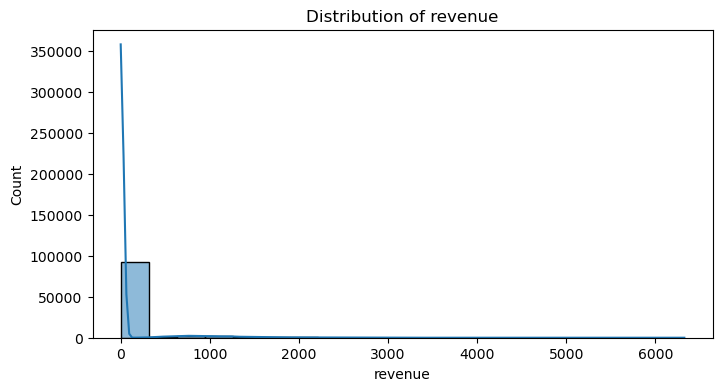


Value counts for target 'illicit':
illicit
0    92421
1     7579
Name: count, dtype: int64


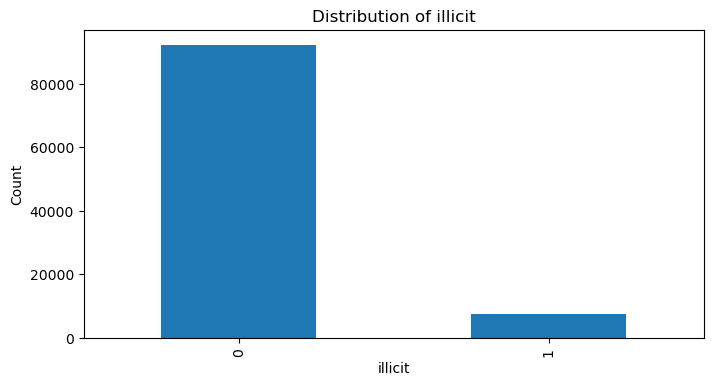

In [15]:
# Check the distribution of the target variable
target_columns = ['revenue','illicit']

for target in target_columns:
    if target in data.columns:
        print(f"\nValue counts for target '{target}':")
        print(data[target].value_counts())

        # Plot target distribution
        plt.figure(figsize=(8, 4))
        if data[target].nunique() < 20:  # For categorical or low-cardinality numerical data
            data[target].value_counts().plot(kind='bar', title=f"Distribution of {target}")
            plt.ylabel("Count")
        else:  # For continuous numerical data
            sns.histplot(data[target], kde=True, bins=20)
            plt.title(f"Distribution of {target}")
        plt.show()
    else:
        print(f"Column '{target}' not found in the dataset.")

In [16]:
# Save basic statistics to a CSV
basic_stats = data.describe().transpose()
basic_stats.to_csv("./evaluation/basic_statistics.csv")

print("Basic statistics saved to './data/basic_statistics.csv'")

Basic statistics saved to './data/basic_statistics.csv'
